<a href="https://colab.research.google.com/github/paulajro/Datos_Clases_Tareas/blob/main/Tarea1_BayesIngenuo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curso de Inteligencia Artificial
Universidad Austral de Chile, año 2021.

Tarea aplicacon Bayes Ingenuo

Fuente: https://www.aprendemachinelearning.com/comprar-casa-o-alquilar-naive-bayes-usando-python/

Adaptación. Paula Romero

Refencias datos:
* https://medlineplus.gov/spanish/ency/article/001927.htm
* https://www.mayoclinic.org/es-es/symptoms/hypoxemia/basics/definition/sym-20050930
* https://www.heart.org/-/media/files/health-topics/answers-by-heart/answers-by-heart-spanish/what-is-highbloodpressure_span.pdf
* https://www.salud.mapfre.es/enfermedades/reportajes-enfermedades/temperatura-fiebre/
* https://www.mayoclinic.org/es-es/diseases-conditions/hypothermia/symptoms-causes/syc-20352682

# Librerias Requeridas

In [1]:
#Carga de Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

# Carga de Datos

In [2]:
# Se emple la función wget que permita bajar al espacio de trabajo los datos para análisis
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/paulajro/Datos_Clases_Tareas/main/Datos_NaiveBayes_T1.csv



--2021-09-13 20:59:39--  https://raw.githubusercontent.com/paulajro/Datos_Clases_Tareas/main/Datos_NaiveBayes_T1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6354 (6.2K) [text/plain]
Saving to: ‘Datos_NaiveBayes_T1.csv’

Datos_NaiveBayes_T1 100%[===================>]   6.21K  --.-KB/s    in 0s      

2021-09-13 20:59:39 (66.7 MB/s) - ‘Datos_NaiveBayes_T1.csv’ saved [6354/6354]



In [3]:
# Utilizando pandas, se carga archivo en memoria como dataframe
df = pd.read_csv("Datos_NaiveBayes_T1.csv")
df.head(10)

,edad,dolor,horas_espera,oxigenacion,presion_sist,presion_diast,temperatura,conciencia,sangrado,accidente,atencion
0,4,7,3,96,142,79,36.2,1,0,0,1
1,56,1,2,93,111,87,35.4,0,1,1,1
2,52,7,3,92,105,71,33.0,1,1,0,0
3,4,3,3,88,150,95,36.2,1,1,0,1
4,65,8,1,89,120,76,36.1,1,0,1,0
5,16,10,4,86,158,96,37.8,1,0,1,1
6,87,4,3,96,124,89,36.0,0,1,0,1
7,51,8,5,94,143,61,33.1,0,0,1,1
8,15,7,5,99,158,74,39.0,0,0,0,1
9,71,2,1,99,99,63,39.1,0,0,0,1


In [4]:
df.tail(10)

,edad,dolor,horas_espera,oxigenacion,presion_sist,presion_diast,temperatura,conciencia,sangrado,accidente,atencion
192,87,7,1,98,133,85,38.4,0,0,0,0
193,64,2,5,100,128,69,37.6,0,1,1,1
194,63,4,2,89,146,70,35.2,1,1,1,0
195,59,1,4,91,118,78,33.9,0,0,1,0
196,3,3,2,100,91,91,37.8,1,1,1,0
197,89,1,0,98,141,63,37.0,0,1,0,1
198,26,7,2,85,127,99,34.9,0,1,0,1
199,43,3,5,98,128,96,37.0,1,1,1,0
200,75,7,2,97,118,95,36.0,0,1,1,1
201,15,7,4,99,106,89,36.0,1,0,1,0


# Datos

Las columnas que tenemos son:
*   edad: la edad del paciente que llega a urgencias
*   dolor: el nivel del dolor del paciente. en una escala del 1-10
*   horas_espera: la cantidad de horas que lleva esperando el paciente
*   oxigenacion: el porcentaje de oxigencion del paciente
*   presion_sist: la presion sistolica del paciente
*   presion_diast: la presion diastolica del paciente
*   temperatura: la temperatura del paciente
*   conciencia: si el paciente esta conciente o inconciente 0:no 1:si
*   sangrado: si el paciente esta sangrando o no 0:no 1:si
*   accidente: si el paciente viene de un accidente en ambulancia 0:no 1:si
*   atencion: indica si el paciente debe ser atendido inmediatamente o puede seguir esperando 0:espera 1:inmediato (esta sera la columna de salida, para aprender)

Algunos supuestos:

Se consideraron estos atributos debido a que son mencionados como "clave" segun algunos profesionales de la salud y se encuentran dentro de la informacion recopilada en la referencia

Para generar los datos se consideraron los siguientes intervalos de los atributos y sus rangos normales:
* oxigenacion: 85 - 100 [mm Hg] - Normal: 95-100
* presion_sist: 90 - 160 [mm Hg] - Normal: <120
* presion_diast: 60 - 100 [mm Hg] - Normal: <80 
* temperatura: 33 - 40 [°C] - Normal: 36-37



# Visualizacion de datos

In [5]:
print(df.groupby('atencion').size())

atencion
0     83
1    119
dtype: int64


En 83 de las entradas el paciente puede continuar esperando y 119 requieren atención inmediata.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc7189ab90>,
      dtype=object)

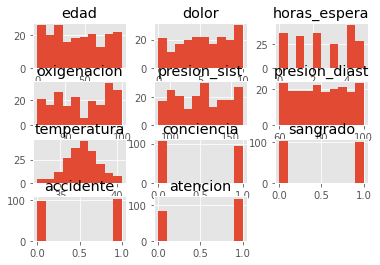

In [6]:
df.hist()

Los atributos "conciencia", "sangrado" y "accidente" tienen valores 0 o 1

El atributo temperatura presenta una distribución normal clara (debido a que así se generaron los datos).

Recordar que el algoritmo NaiveBayes asume que los datos son independientees entre sí y se comportan como una distribución normal 

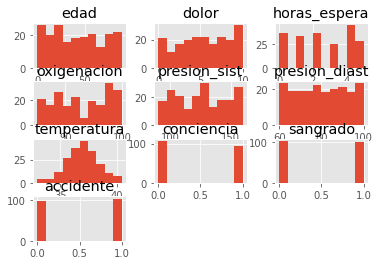

In [7]:
df.drop(['atencion'], axis=1).hist()
plt.show()

Resumenes estadísticos (sin salida y sin "dolor")

In [9]:
#df1 NO contiene la salida (atencion)
df1 = df.drop(['atencion'], axis=1)
df1.describe()

,edad,dolor,horas_espera,oxigenacion,presion_sist,presion_diast,temperatura,conciencia,sangrado,accidente
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,42.717822,4.975248,2.455446,92.792079,125.138614,79.628713,36.946535,0.470297,0.490099,0.514851
std,27.067165,3.045980,1.710516,4.722797,20.504595,11.959541,1.452297,0.500357,0.501144,0.501021
min,0.000000,0.000000,0.000000,85.000000,90.000000,60.000000,33.000000,0.000000,0.000000,0.000000
25%,20.000000,3.000000,1.000000,89.000000,106.250000,70.000000,36.000000,0.000000,0.000000,0.000000
50%,43.500000,5.000000,2.000000,93.000000,126.000000,79.000000,36.900000,0.000000,0.000000,1.000000
75%,64.000000,7.000000,4.000000,97.000000,142.750000,90.000000,37.875000,1.000000,1.000000,1.000000
max,89.000000,10.000000,5.000000,100.000000,160.000000,100.000000,40.400000,1.000000,1.000000,1.000000


In [10]:
#reduced NO contiene la salidad (atencion) ni el atributo "dolor"
reduced = df1.drop(['dolor'], axis=1)
reduced.describe()

,edad,horas_espera,oxigenacion,presion_sist,presion_diast,temperatura,conciencia,sangrado,accidente
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,42.717822,2.455446,92.792079,125.138614,79.628713,36.946535,0.470297,0.490099,0.514851
std,27.067165,1.710516,4.722797,20.504595,11.959541,1.452297,0.500357,0.501144,0.501021
min,0.000000,0.000000,85.000000,90.000000,60.000000,33.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,89.000000,106.250000,70.000000,36.000000,0.000000,0.000000,0.000000
50%,43.500000,2.000000,93.000000,126.000000,79.000000,36.900000,0.000000,0.000000,1.000000
75%,64.000000,4.000000,97.000000,142.750000,90.000000,37.875000,1.000000,1.000000,1.000000
max,89.000000,5.000000,100.000000,160.000000,100.000000,40.400000,1.000000,1.000000,1.000000


# Feature Selection (Selección de características)

En vez de utilizar las 10 columnas de datos de entrada, se utilizará una Clase de SkLearn llamada SelectKBest con la que se seleccionarán las 5 mejores características y sólo se usarán esas.

In [11]:
X=df.drop(['atencion'], axis=1)
y=df['atencion']

#Selección de las 5 mejores características
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['presion_sist', 'presion_diast', 'conciencia', 'sangrado', 'accidente'], dtype='object')


La selección anterior muestra que presion_sist, presion_diast, conciencia, sangrado y accidente son los 5 datos que más importan. De esto se verá su grado de correlación

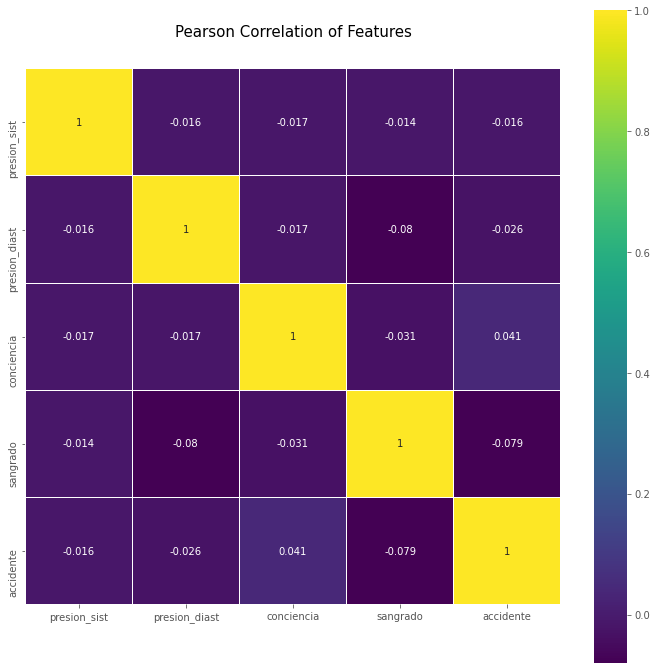

In [12]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Se puede ver que los datos presentan una correlación muy baja (0,08 es lo "más alto")

# Crear el modelo Gaussian Naive Bayes con SKLearn

Primero dividir los datos en training set y test set

In [13]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=6) 
y_train =X_train["atencion"]
y_test = X_test["atencion"]

Se crea el modelo, se pone a aprender con fit() y se obtienen predicciones sobre el conjunto de test.

In [14]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)

y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.88


Se ha obtenido un 88% de precisión en el test set con el clasificador bayesiano

# Uso del modelo

In [16]:
presion_sist=float(input("¿Cuál es la presión sistólica del paciente?: "))
presion_diast=float(input("¿Cuál es la presión diastólica del paciente?: "))
conciencia=float(input("¿El paciente viene conciente? 0-no // 1-si: "))
sangrado=float(input("¿El paciente viene sangrando abundantemente? 0-no // 1-si: "))
accidente=float(input("¿El paciente viene a emergencia en ambulancia? 0-no // 1-si: "))

resultado = gnb.predict([[presion_sist,        presion_diast,     conciencia,       sangrado,         accidente]])

print("---------------")

if (resultado[0]==0):
  print("El paciente puede esperar un tiempo más")
else:
  print("Se recomienda atender inmediatamente al paciente")

¿Cuál es la presión sistólica del paciente?: 120
¿Cuál es la presión diastólica del paciente?: 80
¿El paciente viene conciente? 0-no // 1-si: 1
¿El paciente viene sangrando abundantemente? 0-no // 1-si: 0
¿El paciente viene a emergencia en ambulancia? 0-no // 1-si: 0
---------------
El paciente puede esperar un tiempo más
